In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.2f}".format
%reload_ext nb_black

In [2]:
data_r = pd.read_csv(r'Wine\winequality_red.csv')
data_w = pd.read_csv(r'Wine\winequality_white.csv')

In [3]:
data_r.columns == data_w.columns # Check if red wines and white wines have same columns [features]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [4]:
# We can join our data

In [5]:
data_r['color'] = 'Red'
data_w['color'] = 'White'

In [6]:
wines = pd.concat([data_r,data_w],axis=0)
wines.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
2654,6.90,0.40,0.22,5.95,0.08,76.00,303.00,1.00,3.40,0.57,9.40,5,White
4787,3.90,0.23,0.40,4.20,0.03,29.00,118.00,0.99,3.57,0.36,12.80,8,White
3206,6.60,0.29,0.39,6.75,0.03,22.00,98.00,0.99,3.15,0.80,12.90,7,White
819,6.60,0.56,0.22,8.90,0.03,27.00,133.00,1.00,3.20,0.51,9.10,5,White
982,5.10,0.39,0.21,1.70,0.03,15.00,72.00,0.99,3.50,0.45,12.50,6,White


In [7]:
wines.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [8]:
# We can see that we don't have any nulls in our data. And now shape of data is 6497 items.

In [9]:
wines = pd.get_dummies(wines, columns=["color"])

In [10]:
wines = wines.rename(columns={'color_Red':'Red','color_White':'White'})

In [11]:
wines.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Red,White
317,9.60,0.77,0.12,2.90,0.08,30.00,74.00,1.00,3.30,0.64,10.40,6,1,0
3443,6.00,0.16,0.22,1.60,0.04,36.00,106.00,0.99,3.24,0.32,11.40,6,0,1
888,7.30,0.26,0.31,1.60,0.04,39.00,173.00,0.99,3.19,0.51,11.40,6,0,1


In [12]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Red,White
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82,0.25,0.75
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87,0.43,0.43
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00,0.00,0.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00,0.00,1.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00,0.00,1.00
75%,7.70,0.40,0.39,8.10,0.07,41.00,156.00,1.00,3.32,0.60,11.30,6.00,0.00,1.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00,1.00,1.00


In [21]:
wines_nodummy = pd.concat([data_r,data_w],axis=0)

In [53]:
wines_nodummy.groupby('color')['color'].count()

color
Red      1599
White    4898
Name: color, dtype: int64

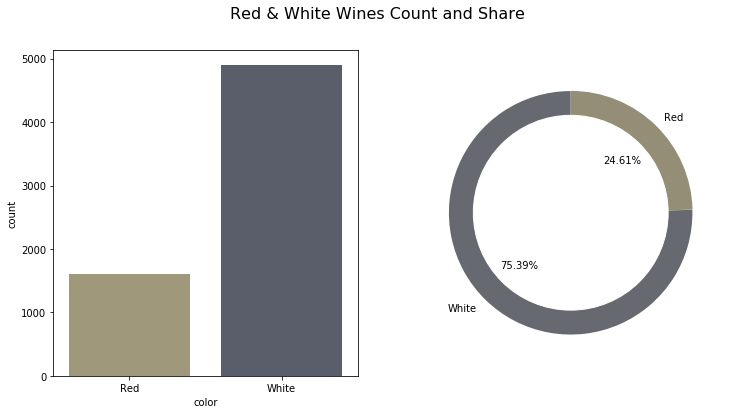

In [109]:
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.countplot(data=wines_nodummy,x='color',palette='cividis_r',ax=ax[0])
color = cm.cividis(np.linspace(.4,.6, 2))
my_circle=plt.Circle( (0,0), 0.8, color='white')
names=wines_nodummy['color'].value_counts().index.tolist()
size=wines_nodummy['color'].value_counts().values.tolist()
plt.pie(size, labels=names, colors=color,autopct='%1.2f%%',explode = (0.001,0.001),startangle=90)
p=plt.gcf()
p.gca().add_artist(my_circle)
f.suptitle("Red & White Wines Count and Share", fontsize=16)
plt.show()

We can see that there is much more White Wines in our dataset. __75%__ of wines are white.
* Red color wines: __1599__ 
* White color wines: __4898__

In [183]:
q = wines_nodummy.groupby('color').agg(['mean','std','count','min','max'])['quality']
q = q.reset_index()
q

,color,mean,std,count,min,max
0,Red,5.64,0.81,1599,3,8
1,White,5.88,0.89,4898,3,9


''

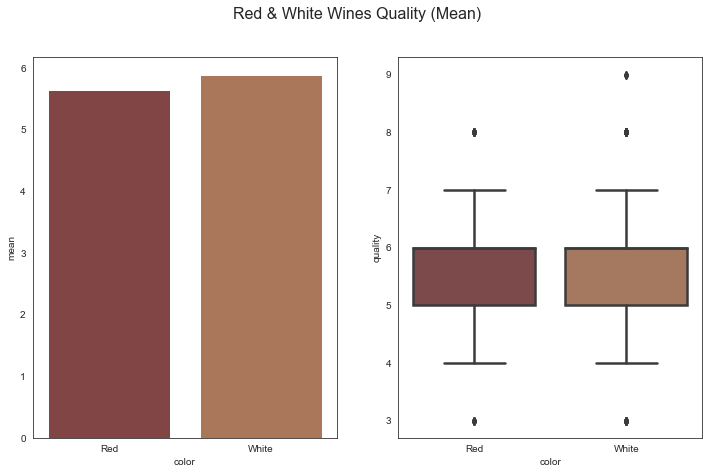

In [184]:
sns.set_style("white")
f, ax = plt.subplots(1,2,figsize=(12,7))
sns.barplot(data=q,y='mean',x='color',palette='tab20b_d',saturation=0.9,ax=ax[0]);
sns.boxplot(data=wines_nodummy,y='quality',linewidth=2.5,x='color',palette='tab20b_d',ax=ax[1])#showmeans=True);
f.suptitle("Red & White Wines Quality (Mean)", fontsize=16)
;
    

In [201]:
mode_r,mode_w = data_r['quality'].mode(),data_w['quality'].mode()
print(f'Mode for Red wines is {int(mode_r)} and for White wine mode is {int(mode_w)}')

Mode for Red wines is 5 and for White wine mode is 6


We can see that mean score for white wines is bigger then for red wines.
* Red wines: mean score __5.64__
* White wines: __5.88__   
* Red wines min-max quality: __3 to 8__
* White wines min-max quality: __3 to 8__
* Mode for Red wines is __5__ 
* Mode for White wine is __6__

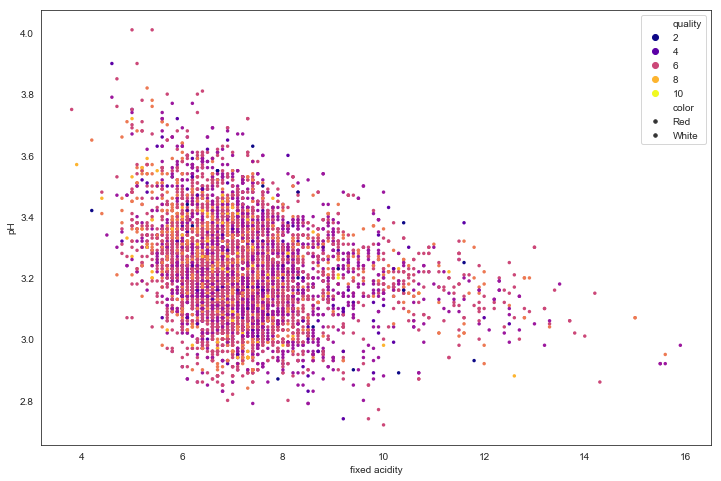

In [232]:
plt.figure(figsize=(12,8))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(data=wines_nodummy,x='fixed acidity',y='pH',hue='quality',size='color',palette="plasma", sizes=(12,12), linewidth=0);